## Ilham Tanzilal Aziizir ##

## 202231119 ##

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

Penjelasan:

pandas: Untuk membaca dan memproses dataset.

matplotlib.pyplot: Untuk visualisasi Decision Tree.

sklearn.model_selection.train_test_split: Untuk membagi dataset menjadi data latih dan data uji.

sklearn.tree.DecisionTreeClassifier: Untuk membuat model klasifikasi Decision Tree.

sklearn.metrics.accuracy_score dan classification_report: Untuk menghitung akurasi dan menampilkan laporan klasifikasi.

sklearn.preprocessing.LabelEncoder: Untuk mengonversi data kategorikal menjadi numerik.


In [2]:
dataset = pd.read_csv('K04_bank_customers.csv', delimiter=';')
dataset

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


Penjelasan:

Dataset dibaca dari file CSV dengan pd.read_csv, bernama 'K04_bank_customers.csv dan menggunakan delimiter ; karena datanya dipisahkan dengan titik koma. Data ini disimpan dalam variabel dataset.

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


Penjelasan:

dataset.info() memberikan informasi tentang tipe data di setiap kolom, apakah ada nilai null, dan jumlah total baris.

In [4]:
categorical_features =[feature for feature in dataset.columns
                       if dataset[feature].dtypes == "O"]
dataset[categorical_features]

,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,management,married,tertiary,no,yes,no,unknown,may,unknown,no
1,technician,single,secondary,no,yes,no,unknown,may,unknown,no
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown,no
3,blue-collar,married,unknown,no,yes,no,unknown,may,unknown,no
4,unknown,single,unknown,no,no,no,unknown,may,unknown,no
...,...,...,...,...,...,...,...,...,...,...
45206,technician,married,tertiary,no,no,no,cellular,nov,unknown,yes
45207,retired,divorced,primary,no,no,no,cellular,nov,unknown,yes
45208,retired,married,secondary,no,no,no,cellular,nov,success,yes
45209,blue-collar,married,secondary,no,no,no,telephone,nov,unknown,no


Penjelasan:

Program mencari kolom dalam dataset yang memiliki tipe data objek (biasanya berupa teks) dan menyimpannya dalam categorical_features. Kolom ini perlu dikonversi menjadi angka agar bisa digunakan dalam model Decision Tree.

In [5]:
for i in categorical_features:
    print(dataset[i].unique())

['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
['married' 'single' 'divorced']
['tertiary' 'secondary' 'unknown' 'primary']
['no' 'yes']
['yes' 'no']
['no' 'yes']
['unknown' 'cellular' 'telephone']
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
['unknown' 'failure' 'other' 'success']
['no' 'yes']


Penjelasan:

Untuk setiap fitur dalam categorical_features, program mencetak nilai unik dalam kolom tersebut. Ini membantu untuk memahami variasi data dalam setiap kolom kategorikal.

In [6]:
label_encoders = {}
for column in dataset.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    dataset[column] = le.fit_transform(dataset[column])
    label_encoders[column] = le

Penjelasan:

Label encoding dilakukan pada kolom kategorikal agar dapat dikonversi ke nilai numerik. Ini dilakukan dengan LabelEncoder, yang mengubah setiap nilai unik dalam kolom kategorikal menjadi angka. Semua LabelEncoder disimpan dalam dictionary label_encoders, sehingga dapat digunakan nanti jika diperlukan untuk mengonversi kembali ke nilai asli.

In [7]:
X = dataset.drop(columns=['y'], errors='ignore')  
y = dataset['y'] if 'y' in dataset.columns else None

Penjelasan:

Kolom y adalah label atau target yang ingin diprediksi (misalnya, apakah pelanggan akan memilih produk atau tidak). X adalah dataset tanpa kolom y. Jika y tidak ada dalam kolom dataset, variabel y akan berisi None.

In [8]:
dataset

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825,0,0,0,17,9,977,3,-1,0,3,1
45207,71,5,0,0,0,1729,0,0,0,17,9,456,2,-1,0,3,1
45208,72,5,1,1,0,5715,0,0,0,17,9,1127,5,184,3,2,1
45209,57,1,1,1,0,668,0,0,1,17,9,508,4,-1,0,3,0


Penjelasan:

Untuk mengecek dataset

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Penjelasan:

Dataset dibagi menjadi data latih dan data uji dengan proporsi 70% untuk data latih dan 30% untuk data uji menggunakan train_test_split. Parameter random_state=42 memastikan bahwa pemisahan data akan selalu konsisten pada setiap run.

In [10]:
model= DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

Penjelasan:

Model DecisionTreeClassifier dibuat dan dilatih menggunakan data latih X_train dan y_train.

In [11]:
y_pred =model.predict(X_test)

Penjelasan:

Model digunakan untuk memprediksi kelas pada data uji X_test, dan hasil prediksi disimpan dalam variabel y_pred.

In [12]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8737835446770864

Penjelasan:

accuracy_score digunakan untuk menghitung akurasi model dengan membandingkan prediksi (y_pred) dengan label sesungguhnya (y_test). Nilai ini menunjukkan persentase data uji yang diprediksi dengan benar oleh model.

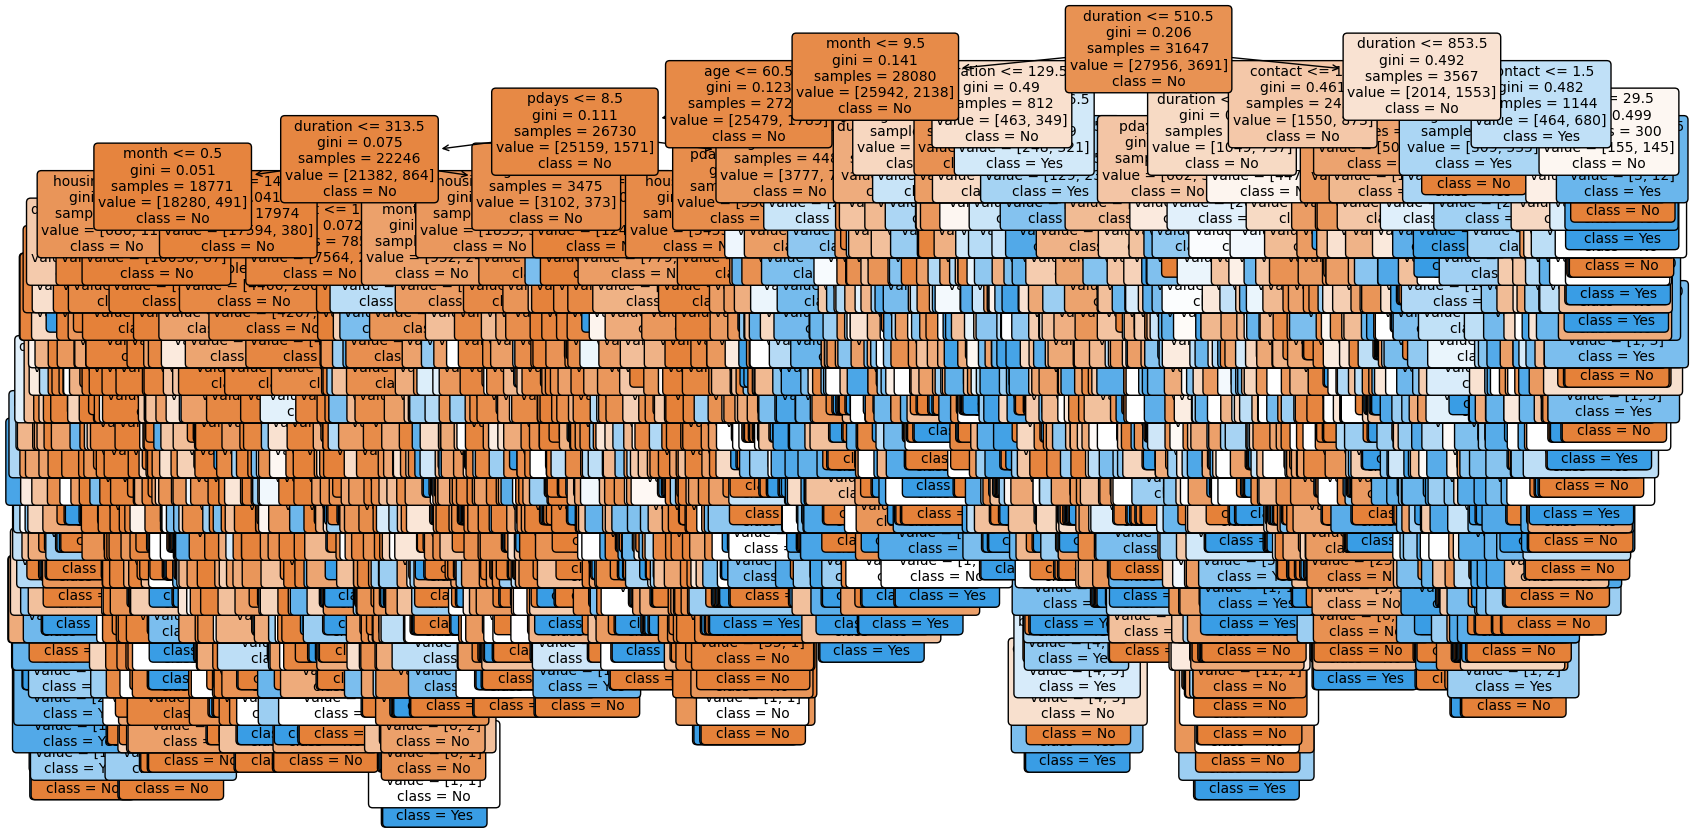

In [14]:
from sklearn import tree
plt.figure(figsize=(20, 10))
tree.plot_tree(model, filled=True, rounded=True, feature_names=X.columns, class_names=['No', 'Yes'], fontsize=10)
plt.show()

Penjelasan:

tree.plot_tree() digunakan untuk menggambar Decision Tree.

Parameter:

filled=True mengisi setiap node dengan warna sesuai dengan kelasnya.

rounded=True membuat bentuk kotak di setiap node lebih membulat.

feature_names=X.columns menampilkan nama fitur pada setiap cabang pohon.

class_names=['No', 'Yes'] menampilkan label kelas di setiap node, dalam hal ini No dan Yes.

plt.figure(figsize=(20, 10)) mengatur ukuran visualisasi.